In [1]:

import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.svm
import matplotlib.pyplot as plt
import tqdm
import itertools
from Problem11Pipleline import *

np.random.seed(42)


In [2]:
df=pd.read_csv('Project1-Classification.csv')
df.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports


## Test with Stochastic Optimizer 
we try to find the optimal hyperparameters with the stochastic optimizer described in "A consensus-based global optimization method for high dimensional machine learning problems"

In [3]:
stochastic_test_accuracy,stochastic_models,stochastic_weights,embeddings=pipeline(df,normalize="mean",optimizer_func=stochastic_find_optimal,
    optimizer_kwargs=dict(particles=10,dimensions=3,bounds=[-1,1],drift_rate=0.3,lr=1,noise_rate=0.2,beta=0.9),
    epochs=50)

KeyboardInterrupt: 

## try with the Bisection Optimizing method

In [ ]:
bisection_test_accuracy,bisection_models,bisection_weights,embeddings=pipeline(df,normalize="mean")


Embeddings dict created
Embeddings created
Finding optimal weights
Optimal weights found: [-0.560546875, -0.904296875, -0.677734375]
val score: 0.9619047619047618
test score: 0.9682539682539683


## Draw the Confusion Matrices

In [ ]:
def draw_confusion_matrix(Y_pred,Y_true,fn,title):
    conf_matrix=sklearn.metrics.confusion_matrix(Y_pred,Y_true)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(title, fontsize=18)
    plt.savefig(fn)

### Draw the Confusion Matrix for the hyperparameters found by the Bisection Optimizing method

In [ ]:
aggregated_embeddings=combined_embeddings(embeddings,weights=bisection_weights)
Y=(df['root_label']=='sports').to_numpy()

_,X_test,_,y_test=sklearn.model_selection.train_test_split(aggregated_embeddings,Y,test_size=0.2,random_state=42)


In [ ]:
bisection_preds=np.zeros(y_test.shape)
for model in bisection_models:
    bisection_preds+=model.predict(X_test)
bisection_preds/=len(bisection_models)
bisection_preds=(bisection_preds>0.5).astype(int)

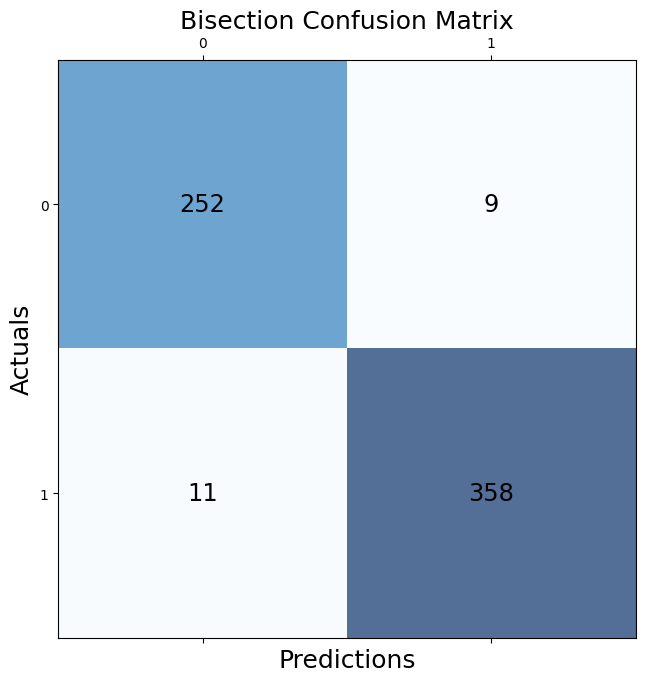

In [9]:
draw_confusion_matrix(bisection_preds,y_test,'bisection_confusion_matrix.png',
    'Bisection Confusion Matrix')

### Draw the Confusion Matrix for the hyperparameters found by the Stochastic Optimizer

In [10]:
aggregated_embeddings=combined_embeddings(embeddings,weights=stochastic_weights)
Y=(df['root_label']=='sports').to_numpy()

_,X_test,_,y_test=sklearn.model_selection.train_test_split(aggregated_embeddings,Y,test_size=0.2,random_state=42)

In [11]:
stochastic_preds=np.zeros(y_test.shape)
for model in stochastic_models:
    stochastic_preds+=model.predict(X_test)
stochastic_preds/=len(stochastic_models)
stochastic_preds=(stochastic_preds>0.5).astype(int)

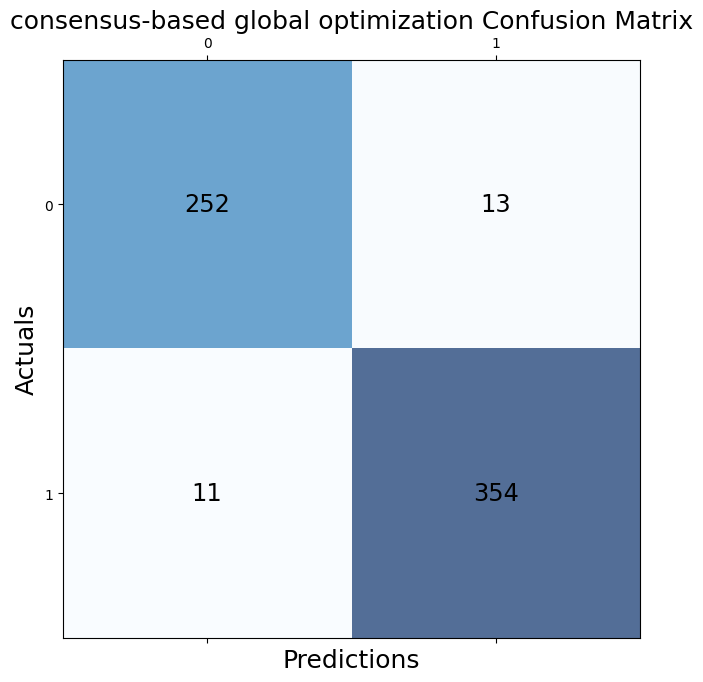

In [12]:
draw_confusion_matrix(stochastic_preds,y_test,'stochastic_confusion_matrix.png',
    'consensus-based global optimization Confusion Matrix')